<a href="https://colab.research.google.com/github/kram254/Real-time-Speech-Emotion/blob/updates/GoEmotions_Model_Performance_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib seaborn pandas numpy

<ipython-input-2-73475b9337d9>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1', y='Label', data=df_optimized.sort_values('F1', ascending=False), palette='viridis')


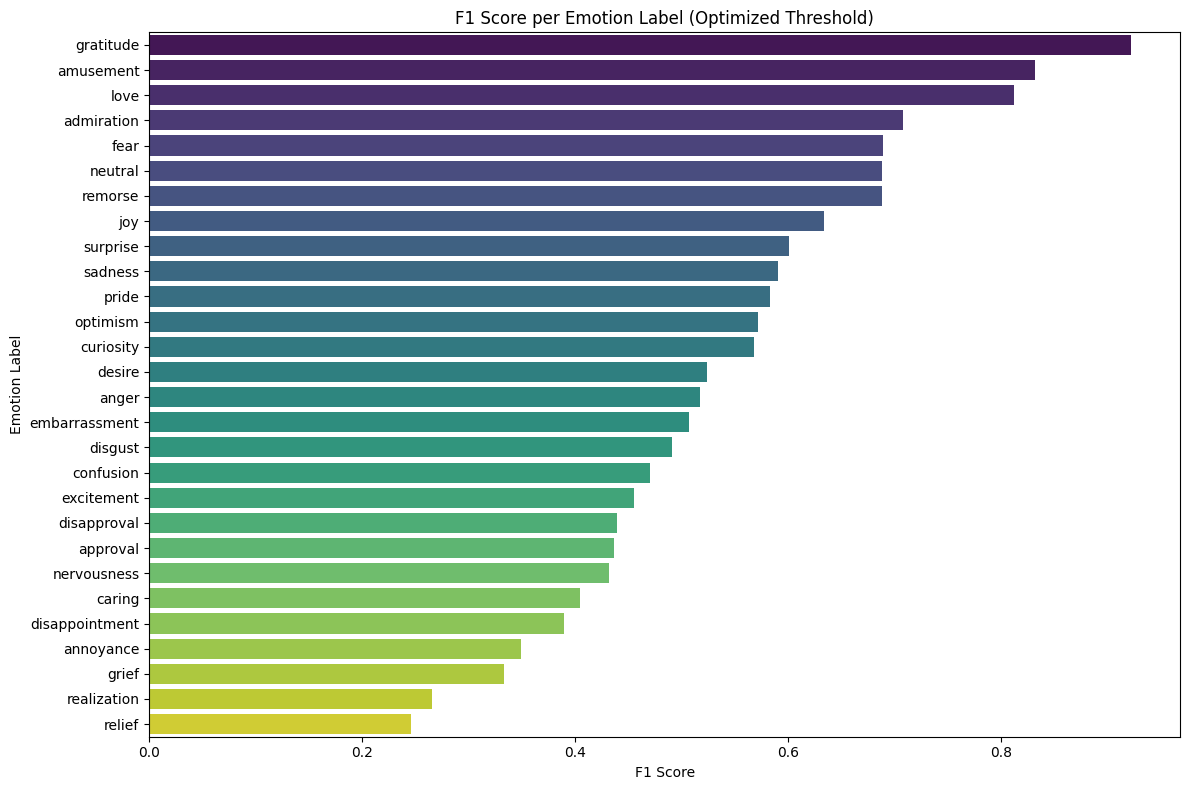

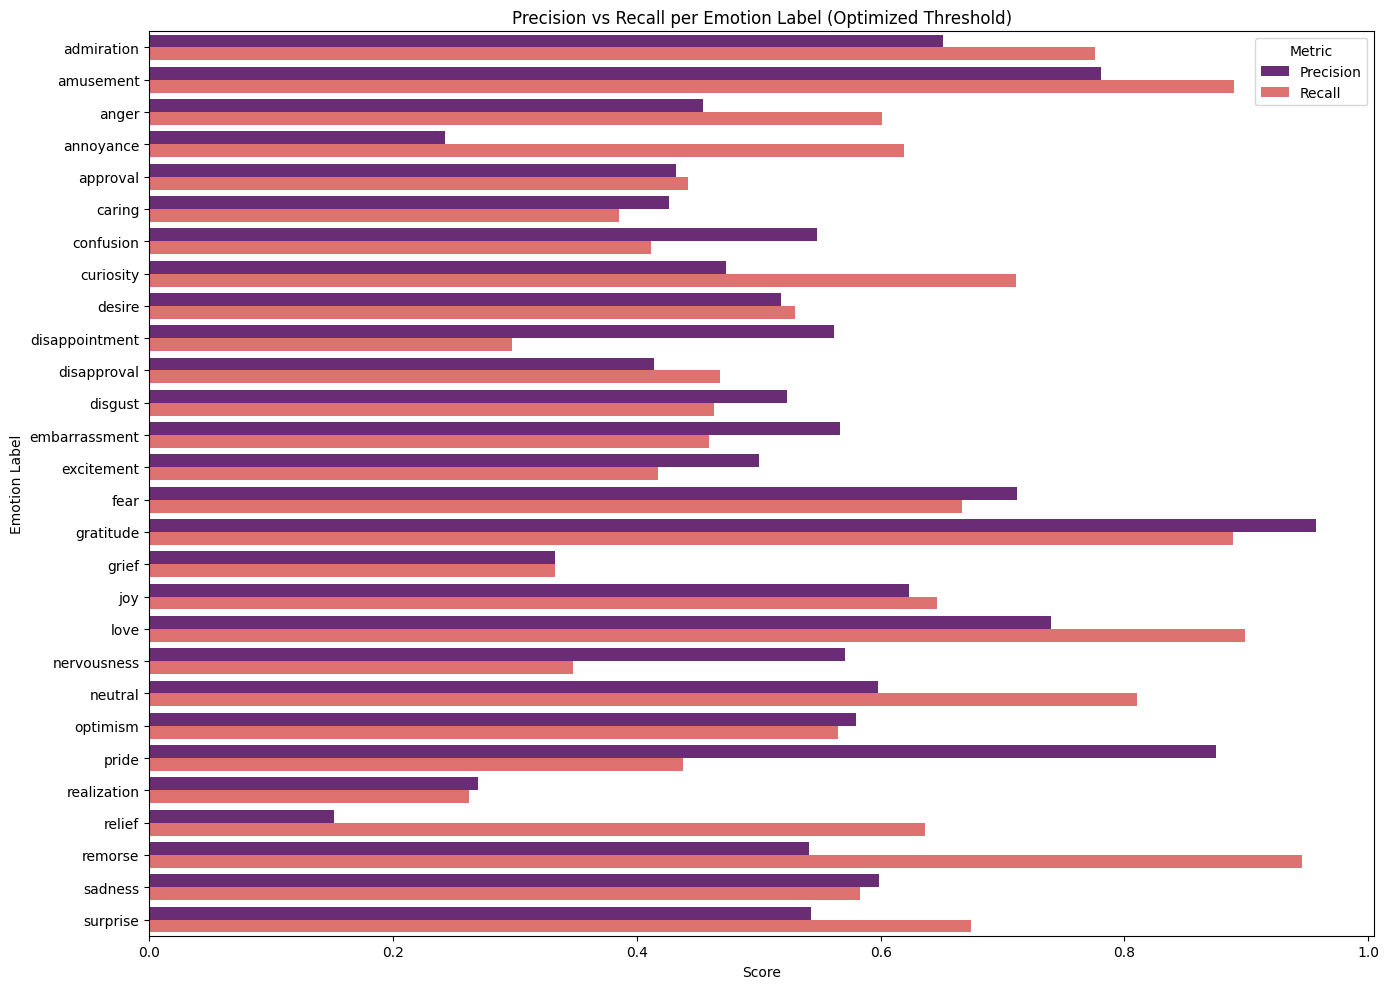

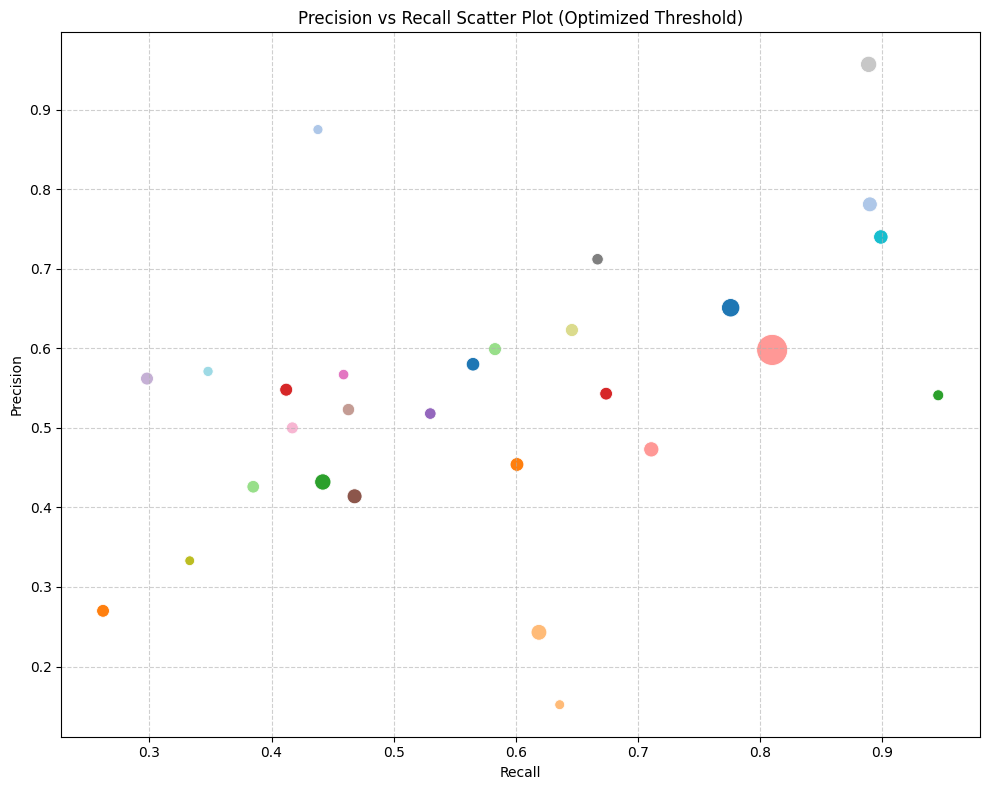

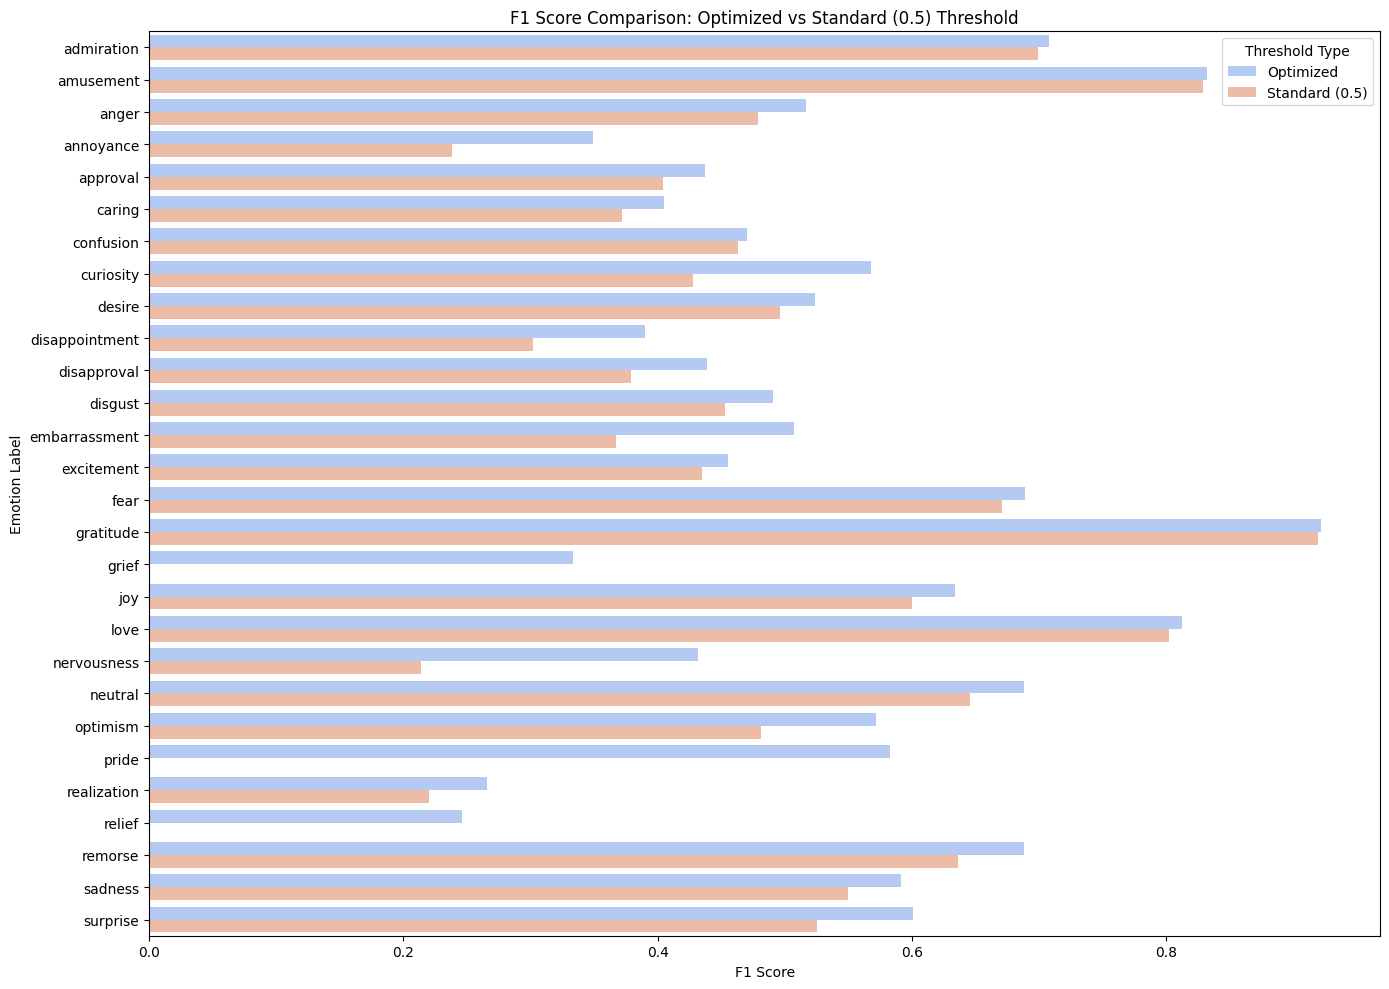

<ipython-input-2-73475b9337d9>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Support', y='Label', data=df_optimized.sort_values('Support', ascending=False), palette='crest')


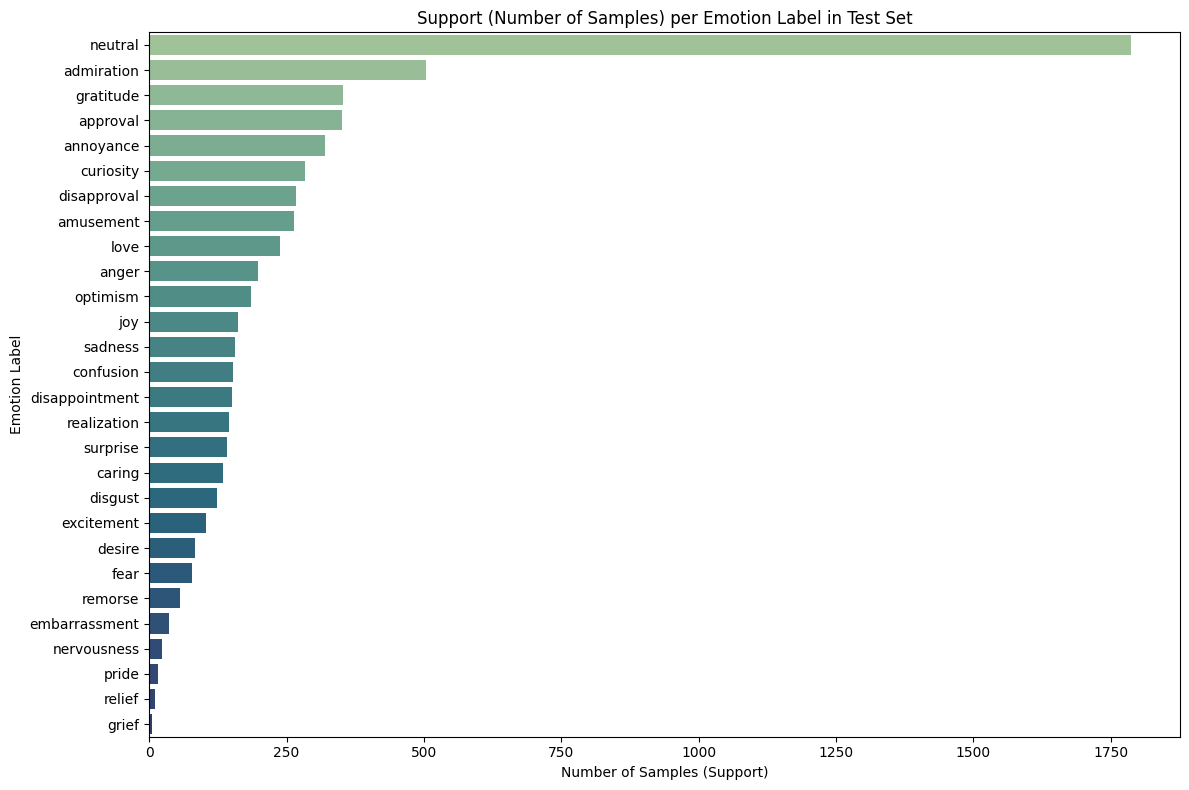

DataFrames created:

Optimized Threshold Data:
        Label  Accuracy  Precision  Recall     F1    MCC  Support  Threshold
0  admiration     0.940      0.651   0.776  0.708  0.678      504       0.25
1   amusement     0.982      0.781   0.890  0.832  0.825      264       0.45
2       anger     0.959      0.454   0.601  0.517  0.502      198       0.15
3   annoyance     0.864      0.243   0.619  0.349  0.328      320       0.10
4    approval     0.926      0.432   0.442  0.437  0.397      351       0.30

Comparison Data (F1 Scores):
        Label  F1_Optimized  F1_Standard_0.5
0  admiration         0.708            0.699
1   amusement         0.832            0.829
2       anger         0.517            0.479
3   annoyance         0.349            0.238
4    approval         0.437            0.404


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Data extracted from the Hugging Face model card (Optimized Threshold)
data_optimized = {
    'Label': ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
    'Accuracy': [0.940, 0.982, 0.959, 0.864, 0.926, 0.972, 0.974, 0.943, 0.985, 0.974, 0.941, 0.978, 0.994, 0.981, 0.991, 0.990, 0.999, 0.978, 0.982, 0.996, 0.971, 0.998, 0.961, 0.992, 0.991, 0.977, 0.977, 0.758],
    'Precision': [0.651, 0.781, 0.454, 0.243, 0.432, 0.426, 0.548, 0.473, 0.518, 0.562, 0.414, 0.523, 0.567, 0.500, 0.712, 0.957, 0.333, 0.623, 0.740, 0.571, 0.580, 0.875, 0.270, 0.152, 0.541, 0.599, 0.543, 0.598],
    'Recall': [0.776, 0.890, 0.601, 0.619, 0.442, 0.385, 0.412, 0.711, 0.530, 0.298, 0.468, 0.463, 0.459, 0.417, 0.667, 0.889, 0.333, 0.646, 0.899, 0.348, 0.565, 0.438, 0.262, 0.636, 0.946, 0.583, 0.674, 0.810],
    'F1': [0.708, 0.832, 0.517, 0.349, 0.437, 0.405, 0.470, 0.568, 0.524, 0.390, 0.439, 0.491, 0.507, 0.455, 0.689, 0.922, 0.333, 0.634, 0.812, 0.432, 0.572, 0.583, 0.266, 0.246, 0.688, 0.591, 0.601, 0.688],
    'MCC': [0.678, 0.825, 0.502, 0.328, 0.397, 0.391, 0.462, 0.552, 0.516, 0.398, 0.409, 0.481, 0.507, 0.447, 0.685, 0.917, 0.333, 0.623, 0.807, 0.444, 0.557, 0.618, 0.246, 0.309, 0.712, 0.579, 0.593, 0.513],
    'Support': [504, 264, 198, 320, 351, 135, 153, 284, 83, 151, 267, 123, 37, 103, 78, 352, 6, 161, 238, 23, 186, 16, 145, 11, 56, 156, 141, 1787],
    'Threshold': [0.25, 0.45, 0.15, 0.10, 0.30, 0.40, 0.55, 0.25, 0.25, 0.40, 0.30, 0.20, 0.10, 0.35, 0.40, 0.45, 0.05, 0.40, 0.25, 0.25, 0.20, 0.10, 0.15, 0.05, 0.10, 0.40, 0.15, 0.25]
   }

# Data extracted from the Hugging Face model card (Standard Threshold 0.5)
data_standard = {
    'Label': ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
    'F1': [0.699, 0.829, 0.479, 0.238, 0.404, 0.372, 0.463, 0.428, 0.496, 0.302, 0.379, 0.453, 0.367, 0.435, 0.671, 0.919, 0.000, 0.600, 0.802, 0.214, 0.481, 0.000, 0.220, 0.000, 0.636, 0.550, 0.525, 0.646]
}

# Create DataFrames
df_optimized = pd.DataFrame(data_optimized)
df_standard = pd.DataFrame(data_standard)

# Merge the F1 scores for comparison
df_compare = pd.merge(df_optimized[['Label', 'F1']], df_standard, on='Label', suffixes=('_Optimized', '_Standard_0.5'))

# --- Visualization 1: F1 Score per Label (Optimized Threshold) ---
plt.figure(figsize=(12, 8))
sns.barplot(x='F1', y='Label', data=df_optimized.sort_values('F1', ascending=False), palette='viridis')
plt.title('F1 Score per Emotion Label (Optimized Threshold)')
plt.xlabel('F1 Score')
plt.ylabel('Emotion Label')
plt.tight_layout()
plt.show()

# --- Visualization 2: Precision vs Recall per Label (Optimized Threshold) ---
# Prepare data for grouped bar chart
df_pr = df_optimized[['Label', 'Precision', 'Recall']].melt(id_vars='Label', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 10))
sns.barplot(x='Score', y='Label', hue='Metric', data=df_pr.sort_values(by=['Label','Metric']), palette='magma')
plt.title('Precision vs Recall per Emotion Label (Optimized Threshold)')
plt.xlabel('Score')
plt.ylabel('Emotion Label')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# --- Visualization 3: Scatter Plot of Precision vs Recall (Optimized Threshold) ---
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_optimized, x='Recall', y='Precision', hue='Label', size='Support', sizes=(50, 500), palette='tab20', legend=False) # Using tab20 for more colors
plt.title('Precision vs Recall Scatter Plot (Optimized Threshold)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True, linestyle='--', alpha=0.6)
# Add labels for points (optional, can get crowded)
# for i in range(df_optimized.shape[0]):
#     plt.text(x=df_optimized.Recall[i]+0.01, y=df_optimized.Precision[i]+0.01, s=df_optimized.Label[i], fontdict=dict(color='black',size=8))
plt.tight_layout()
plt.show()


# --- Visualization 4: F1 Score Comparison (Optimized vs Standard 0.5 Threshold) ---
df_compare_melt = df_compare.melt(id_vars='Label', var_name='Threshold_Type', value_name='F1_Score')
df_compare_melt['Threshold_Type'] = df_compare_melt['Threshold_Type'].replace({'F1_Optimized': 'Optimized', 'F1_Standard_0.5': 'Standard (0.5)'})

plt.figure(figsize=(14, 10))
sns.barplot(x='F1_Score', y='Label', hue='Threshold_Type', data=df_compare_melt.sort_values(by=['Label','Threshold_Type']), palette='coolwarm')
plt.title('F1 Score Comparison: Optimized vs Standard (0.5) Threshold')
plt.xlabel('F1 Score')
plt.ylabel('Emotion Label')
plt.legend(title='Threshold Type')
plt.tight_layout()
plt.show()

# --- Visualization 5: Support per Label ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Support', y='Label', data=df_optimized.sort_values('Support', ascending=False), palette='crest')
plt.title('Support (Number of Samples) per Emotion Label in Test Set')
plt.xlabel('Number of Samples (Support)')
plt.ylabel('Emotion Label')
plt.tight_layout()
plt.show()

print("DataFrames created:")
print("\nOptimized Threshold Data:")
print(df_optimized.head())
print("\nComparison Data (F1 Scores):")
print(df_compare.head())